### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

**自变量是文字颜色是否一致，因变量是全部完成所需要的时间**

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

**假设集**

μ<sub>0</sub>是文字和颜色一致时，所需要的总体平均时间

μ<sub>1</sub>是文字和颜色不一致时，所需要的总体平均时间

**零假设：H<sub>0</sub>:μ<sub>0</sub> = μ<sub>1</sub> 文字和颜色不一致，所需要的平均时间相同**

**对立假设：H<sub>1</sub>:μ<sub>0</sub> ≠μ<sub>1</sub> 文字和颜色不一致，所需要的平均时间不相同**

> T检验是用于小样本（样本容量小于30）的两个平均值差异程度的检验方法。它是用T分布理论来推断差异发生的概率，从而判定两个平均数的差异是否显著。<sup>[1]</sup>

>配对设计：将受试对象的某些重要特征按相近的原则配成对子，目的是消除混杂因素的影响，一对观察对象之间除了处理因素/研究因素之外，其它因素基本齐同，每对中的两个个体随机给予两种处理。<sup>[1]</sup>

> - 两种同质对象分别接受两种不同的处理，如性别、年龄、体重、病情程度相同配成对。
- 同一受试对象或同一样本的两个部分，分别接受两种不同的处理
- 自身对比。即同一受试对象处理前后的结果进行比较。
>目的：判断不同的处理是否有差别<sup>[1]</sup>

>计算公式及意义：<sup>[1]</sup>

>t 统计量：![t公式](https://wiki.mbalib.com/w/images/math/a/6/a/a6a7f0e435fb2bcb315c84e61954b911.png)

>自由度：v=对子数-1<sup>[1]</sup>

>适用条件：配对资料<sup>[1]</sup>

所以选择T检验来判断μ<sub>0</sub>和μ<sub>1</sub>

两组样本n相同，除了观察元素外其余特征基本相同，所以使用配对样本t检验。

想要知道差异是否显著，所以选择双尾检验

设α的值为0.05

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
# 在这里执行你的分析
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline
df = pd.read_csv('stroopdata.csv')
df_c = df.iloc[:, :1]
df_i = df.iloc[:, 1:2]


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [3]:
n = 24
ddof = 23
sqrt_ddof = np.sqrt(ddof)
sqrt_n = np.sqrt(n)
df_desc = df.describe()
c_mean, i_mean = df_desc.loc['mean']
c_std, i_std = df_desc.loc['std']

In [4]:
df_ic = pd.Series(df.Incongruent-df.Congruent)
d = df_ic.mean()
df_diff = (df_ic-d)*(df_ic-d)
s = np.sqrt(df_diff.sum()/ddof)

In [5]:
print("c_mean: "+str(c_mean))
print("i_mean: "+str(i_mean))
print("c_std: "+str(c_std))
print("i_std: "+str(i_std))
print("d: "+str(d))
print("s: "+str(s))

c_mean: 14.051125000000004
i_mean: 22.01591666666667
c_std: 3.559357957645195
i_std: 4.797057122469138
d: 7.964791666666667
s: 4.864826910359056


文字和颜色一致时，所需要的**平均时间14.0511，样本标准差为3.5594**

文字和颜色不一致时，所需要的**平均时间为22.0159，样本标准差为4.7971**

**样本差的平均数d = 7.9648**

**样本差的标准差s = 4.8648**

**ddof = 24-1 = 23**

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

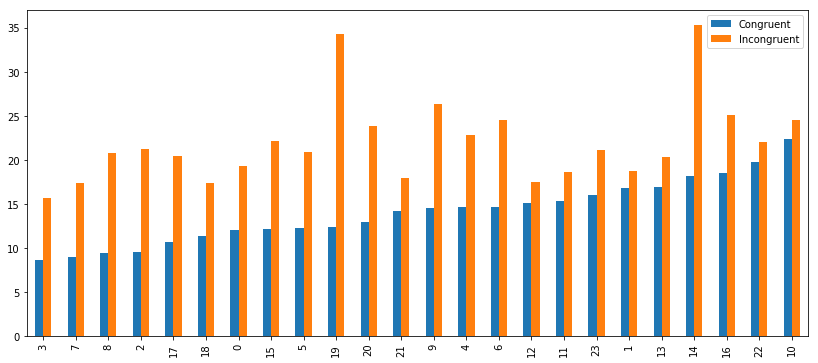

In [6]:
# 在这里创建可视化图表
table = df.sort_values(by=['Congruent'])
table.plot(kind='bar', figsize=(14, 6));

从图上可以看出Incongruent普遍要比Congruent高

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [7]:
# 在这里执行统计检验
print("样本差的平均数d: "+str(d))
print("样本差的标准差Sn: "+str(s))

样本差的平均数d: 7.964791666666667
样本差的标准差Sn: 4.864826910359056


![置信区间](https://wikimedia.org/api/rest_v1/media/math/render/svg/4af3810586619c1e7f395c7ccbf5f1607e08bedf)
通过这个公式，可以得到置信区间<sup>[2]</sup>

- α=0.05，查表得到95%双侧T分布区间值为2.069
- X平均值=7.9648
- A = 2.069
- S<sub>n</sub> = 4.8648
- n = 24

In [8]:
a = 2.069
confide_max = d+a*(s/sqrt_n)
confide_min = d-a*(s/sqrt_n)
print("置信区间为：" + str(confide_min) + "-" + str(confide_max))

置信区间为：5.91021542131028-10.019367912023053


In [9]:
t = d/(s/sqrt_n)
print("求得t = " + str(t))

求得t = 8.020706944109957


8.0207 > 2.069

所以p < 0.05

可以拒绝零假设

**结论为 文字和颜色不一致，所需要的平均时间不相同**

1. [T检验-MBA智库百科<sup>[1]</sup>](https://wiki.mbalib.com/wiki/T%E6%A3%80%E9%AA%8C)

2. [学生t-分布 - 维基百科<sup>[2]</sup>](https://zh.wikipedia.org/wiki/%E5%AD%A6%E7%94%9Ft-%E5%88%86%E5%B8%83)